# KNN - (K-Nearest-Neigbors)

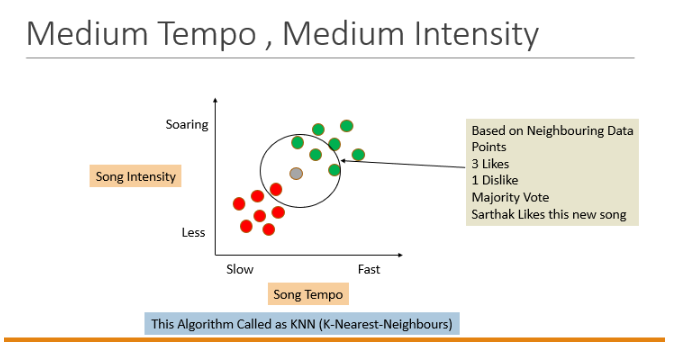

In [2]:
from warnings import filterwarnings
filterwarnings ('ignore')


### Step 1 : Read the train dataset

In [3]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Step 2: Perform basic data quality checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:

df.duplicated().sum()

np.int64(1)

### Step 3 : Seperate X and Y (specices)

In [8]:
X = df.drop(columns= ['species'])
Y = df[['species']]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Step 4 : Perform Preprocessing on X

In [12]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [16]:

X_pre = num_pipe.fit_transform(X)

In [17]:

X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Apply train test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [19]:

xtrain.shape

(100, 4)

In [20]:

xtest.shape

(50, 4)

In [21]:

xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [22]:

ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [23]:

xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [24]:

ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### Step 6: Create the model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=33)
model1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=33)

In [26]:
model1.score(xtrain, ytrain)

0.87

In [27]:
model1.score(xtest, ytest)

0.9

### Hyperparameter tuning


In [28]:
params = {'n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [29]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
gscv1 = GridSearchCV(knn, param_grid=params, cv=5, scoring='f1_macro')
gscv1.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='f1_macro')

In [30]:
gscv1.best_params_

{'n_neighbors': 3}

In [31]:
gscv1.best_score_

np.float64(0.9319552669552669)

In [32]:
best_knn = gscv1.best_estimator_
best_knn


KNeighborsClassifier(n_neighbors=3)

In [33]:
best_knn.score(xtrain, ytrain)


0.95

In [34]:
best_knn.score(xtest, ytest)

0.98

# Model 2 : SVM

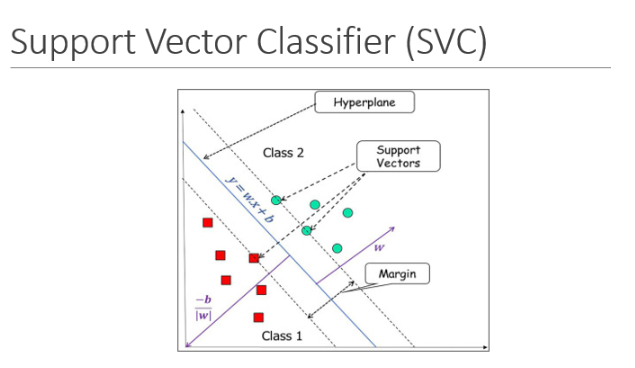

In [35]:
from sklearn.svm import SVC
model2 = SVC(probability=True)
model2.fit(xtrain, ytrain)

SVC(probability=True)

In [36]:
model2.score(xtrain, ytrain)


0.97

In [37]:
model2.score(xtest, ytest)

0.98

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, xtrain, ytrain, cv=5, scoring='f1_macro')
scores

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [39]:
scores.mean()

np.float64(0.9319552669552669)

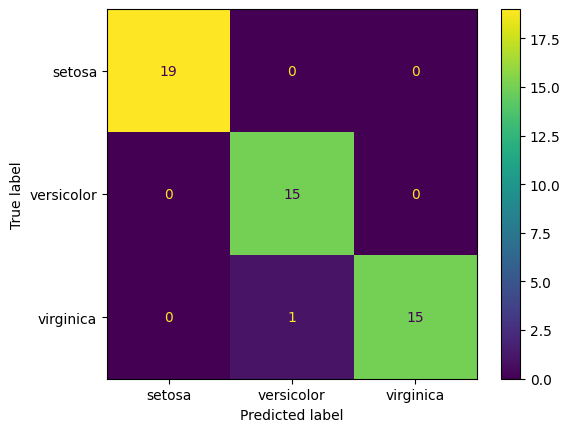

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model2, xtest, ytest)

In [41]:
ypred_train = model2.predict(xtrain)
ypred_test = model2.predict(xtest)

In [42]:

ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [43]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [45]:
xnew = pd.read_csv("iris_sample.csv")
xnew


,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [46]:
num_pipe


Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [47]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [48]:
preds = model2.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [49]:
probs = model2.predict_proba(xnew_pre)
probs[0:5]

array([[0.00775042, 0.97202963, 0.02021995],
       [0.01187647, 0.02318797, 0.96493557],
       [0.03208126, 0.95411131, 0.01380743],
       [0.63217856, 0.28837829, 0.07944315],
       [0.01356196, 0.24533357, 0.74110447]])

In [50]:
model2.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.97202963, 0.96493557, 0.95411131, 0.63217856, 0.74110447,
       0.9583427 , 0.94094944, 0.94459199, 0.96530564, 0.81062876,
       0.9805849 , 0.98066825, 0.96015935, 0.77982492, 0.63078449])

### Save above results with prob

In [52]:
xnew["species_pred"] = preds
xnew["prob"] = max_probs

In [53]:

xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.972030
1,6.9,3.1,5.1,2.3,virginica,0.964936
2,5.1,2.5,3.0,1.1,versicolor,0.954111
3,4.4,2.9,NaN,0.2,setosa,0.632179
4,5.9,3.0,5.1,1.8,virginica,0.741104
5,5.5,3.5,1.3,0.2,setosa,0.958343
6,5.6,NaN,3.6,1.3,versicolor,0.940949
7,6.5,3.0,5.2,2.0,virginica,0.944592
8,5.3,3.7,1.5,0.2,setosa,0.965306
9,5.1,3.4,1.5,NaN,setosa,0.810629
